# 2020 Saudi Arabia Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this Analysis
- initial exploration of cleaned datasets for happiness and cases in Saudi Arabia
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
sa_hap_filter = pd.read_csv('../data/cleaned_data/2020/saudi_arabia_hap_cleaned.csv')
sa_cov=pd.read_csv('../data/cleaned_data/2020/sa_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
sa_hap_filter

,Unnamed: 0,date,week,mental_health_condition,age,gender,happiness_rating
0,940,2020-04-28,week 2,No,30,Male,7.0
1,941,2020-04-28,week 2,No,40,Female,10.0
2,942,2020-04-28,week 2,No,53,Male,6.0
3,943,2020-04-28,week 2,No,35,Male,7.0
4,944,2020-04-28,week 2,No,33,Male,6.0
...,...,...,...,...,...,...,...
10505,11445,2020-09-29,week 12,No,22,Female,7.0
10506,11446,2020-09-29,week 12,No,19,Female,5.0
10507,11447,2020-09-29,week 12,No,55,Female,7.0
10508,11448,2020-09-29,week 12,No,48,Female,4.0


In [4]:
sa_hap_filter.shape

(10510, 7)

In [5]:
# Get some information on the dataset and range
sa_hap_filter['happiness_rating'].describe()

count    10510.000000
mean         6.188963
std          2.393268
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: happiness_rating, dtype: float64

<AxesSubplot:>

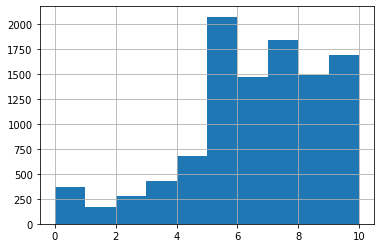

In [6]:
# Histogram to look at distribution
sa_hap_filter['happiness_rating'].hist()

In [7]:
sa_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,NaN,Saudi Arabia,23.885942,45.079162,2020-01-22,0
1,1,NaN,Saudi Arabia,23.885942,45.079162,2020-01-23,0
2,2,NaN,Saudi Arabia,23.885942,45.079162,2020-01-24,0
3,3,NaN,Saudi Arabia,23.885942,45.079162,2020-01-25,0
4,4,NaN,Saudi Arabia,23.885942,45.079162,2020-01-26,0
...,...,...,...,...,...,...,...
312,312,NaN,Saudi Arabia,23.885942,45.079162,2020-11-29,357128
313,313,NaN,Saudi Arabia,23.885942,45.079162,2020-11-30,357360
314,314,NaN,Saudi Arabia,23.885942,45.079162,2020-12-01,357623
315,315,NaN,Saudi Arabia,23.885942,45.079162,2020-12-02,357872


In [8]:
sa_cov.shape

(317, 7)

In [9]:
sa_cov['cases'].describe()

count       317.000000
mean     172663.365931
std      146039.169766
min           0.000000
25%        3651.000000
50%      182493.000000
75%      326930.000000
max      358102.000000
Name: cases, dtype: float64

In [10]:
sa_cov = sa_cov[['date','cases']]
sa_cov

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
312,2020-11-29,357128
313,2020-11-30,357360
314,2020-12-01,357623
315,2020-12-02,357872


### Group COVID-19 cases by date

In [11]:
sa_cov['date'] = pd.to_datetime(sa_cov['date'])

In [12]:
sa_date_cov= sa_cov.groupby('date').sum()
sa_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-11-29,357128
2020-11-30,357360
2020-12-01,357623


Text(0, 0.5, 'Cases')

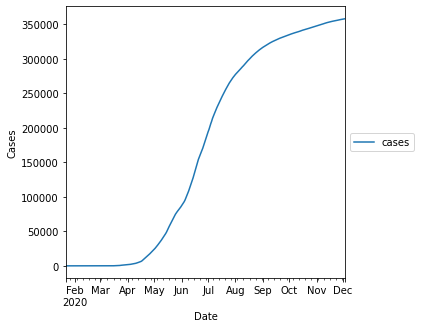

In [13]:
sa_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations

Cumulative cases is in the form of a S-shaped curve so maybe a surge in cases around June/July but has since plateaued. 

### Calculating daily changes in COVID-19 cases count

In [14]:
sa_date_cov['daily_change'] = sa_date_cov['cases'].diff()
sa_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,357128,217.0
2020-11-30,357360,232.0
2020-12-01,357623,263.0


<AxesSubplot:xlabel='date'>

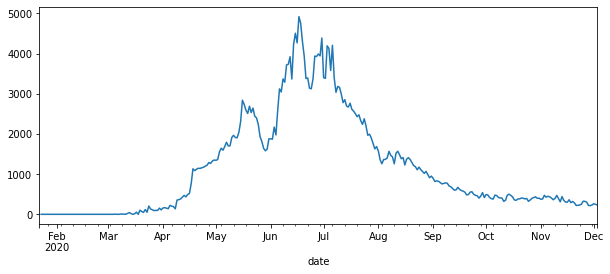

In [15]:
# plot of daily change in cases
sa_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
Seems that COVID-19 is well controlled in SA after August. Peaked around mid-May and mid-June, but no additional surges between Nov- Dec that have been seen in some of the other countries.

In [16]:
sa_date_cov.to_csv('../data/exported_subset_data/covid/covid_saudi_arabia.csv')

### Group happiness ratings by date

In [17]:
sa_df=sa_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [18]:
sa_df

,date,happiness_rating
0,2020-01-05,6.560000
1,2020-01-06,4.000000
2,2020-01-07,5.500000
3,2020-01-08,4.666667
4,2020-02-05,5.615385
...,...,...
125,2020-11-08,6.100000
126,2020-12-05,6.000000
127,2020-12-06,6.315789
128,2020-12-07,6.151163


### Create new column with just month and year for date

In [19]:
sa_df['month_year'] = pd.to_datetime(sa_df['date']).dt.to_period('M')

In [20]:
sa_df['date'] = pd.to_datetime(sa_df['date'])

In [21]:
sa_df

,date,happiness_rating,month_year
0,2020-01-05,6.560000,2020-01
1,2020-01-06,4.000000,2020-01
2,2020-01-07,5.500000,2020-01
3,2020-01-08,4.666667,2020-01
4,2020-02-05,5.615385,2020-02
...,...,...,...
125,2020-11-08,6.100000,2020-11
126,2020-12-05,6.000000,2020-12
127,2020-12-06,6.315789,2020-12
128,2020-12-07,6.151163,2020-12


## Happiness rating grouped by days vs. COVID-19 daily case changes

<AxesSubplot:label='8301fdb3-9b3a-4c69-b3b6-5f9d111bf576'>

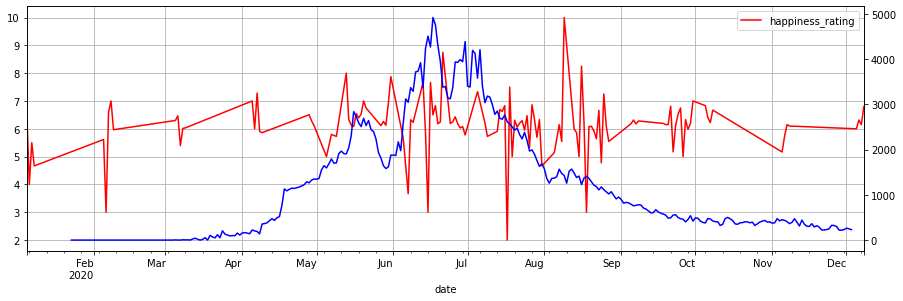

In [22]:
sa_df.plot(x='date',y='happiness_rating', color='red',grid=True, figsize=(15,5))
sa_date_cov['daily_change'].plot(color='blue', grid=True, secondary_y=True)

In [23]:
sa_df.groupby('month_year')['happiness_rating'].mean()

month_year
2020-01    5.181667
2020-02    5.636410
2020-03    6.042225
2020-04    6.369366
2020-05    6.446306
2020-06    6.176610
2020-07    6.041018
2020-08    6.065683
2020-09    6.196732
2020-10    6.534147
2020-11    5.788510
2020-12    6.316738
Freq: M, Name: happiness_rating, dtype: float64

### Merge happiness and COVID-19 cases into one df

In [24]:
merged_df= pd.merge(left=sa_df, left_on='date',
         right=sa_date_cov, right_on='date')

In [25]:
merged_df['month_year'] = pd.to_datetime(merged_df['date']).dt.to_period('M')

### Monthly COVID-19 cases plotted with monthly happiness rating means

<AxesSubplot:label='1226dd86-0910-4ea5-9c8a-20bde35d933d'>

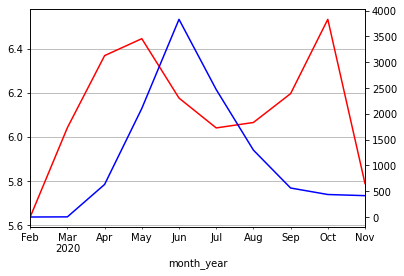

In [26]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations
Peak cases in May/June, with dip in happiness in those same months. Decrease in cases and stabilized starting in September with another peak in happiness. Some broader patterns are seen.

## Interpolated Happiness Ratings

In [27]:
sa_df_daily=sa_df.set_index(pd.to_datetime(sa_df['date']))

In [28]:
sa_df_daily=sa_df_daily[['date', 'happiness_rating']]

In [29]:
sa_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_saudi_arabia.csv')

In [30]:
weekly_covid=sa_date_cov.rolling(7).mean()

<AxesSubplot:label='06d3c66b-8199-4e32-8ac1-4039e7089a7e'>

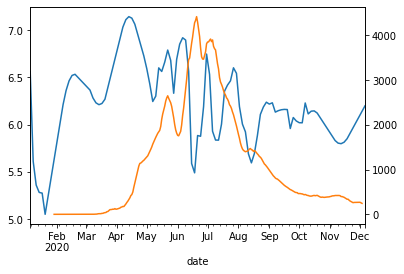

In [31]:
sa_df_daily.resample('3D').interpolate().rolling('14D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations
Resampled, interpolated, and rolling mean taken for happiness. Large dip in happiness mid-June with largest peak in cases at that time. Similar pattern seen earlier with mid-May and mid-August. Fluctuations in happiness in other times throughout 2020 but not clear correlations at those times with cases. It is interesting that SA has largely controlled the pandemic.

## Happiness rating mean for 2020 as a whole in Saudi Arabia

In [32]:
sa_hap_filter['happiness_rating'].mean()

6.1889628924833495

### Observations
SA's happiness rating in 2019 was 6.56. Slight decrease!